In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from principal_DNN_MNIST import DNN
from read_save import lire_mnist

In [3]:
X_train, X_test, y_train, y_test = lire_mnist()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [13]:
layer_sizes = [784, 200, 200, 10]
mini_batch_size = 500
lr = 0.1
nb_epochs = 100

In [14]:
DNN_model = DNN(layer_sizes)
DNN_model.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train, verbose = True, step=25)

Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/100, erreur de reconstruction: 0.05391617687523122
Epoch 26/100, erreur de reconstruction: 0.019144731395069732
Epoch 51/100, erreur de reconstruction: 0.015671067571266743
Epoch 76/100, erreur de reconstruction: 0.014227415807297656
Epoch 100/100, erreur de reconstruction: 0.013434755462904669
Entraînement RBM 2 / 3
Epoch 1/100, erreur de reconstruction: 0.11464181635255785
Epoch 26/100, erreur de reconstruction: 0.024449168717713406
Epoch 51/100, erreur de reconstruction: 0.018390745607120763
Epoch 76/100, erreur de reconstruction: 0.016097075530055568
Epoch 100/100, erreur de reconstruction: 0.014959981254056976
Entraînement RBM 3 / 3
Epoch 1/100, erreur de reconstruction: 0.12043193143779396
Epoch 26/100, erreur de reconstruction: 0.08011588281939556
Epoch 51/100, erreur de reconstruction: 0.07950414609906453
Epoch 76/100, erreur de reconstruction: 0.0792088752977712
Epoch 100/100, erreur de reconstruction: 0.0791081966519

In [15]:
DNN_model.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)

Entraînement DNN
Epoch 1/100, loss: 8.501790480280766
Epoch 26/100, loss: 0.2834727671739281
Epoch 51/100, loss: 0.2014219655956493
Epoch 76/100, loss: 0.1635034396206226
Epoch 100/100, loss: 0.14033191957310298


In [16]:
accuracy = DNN_model.test_DNN(X_test, y_test)

Accuracy: 0.9531


### Analyse des hyperparamètres
#### DBN entraîné ou non ?

In [20]:
print("-- Pretraining model --")
DNN_pretraining = DNN(layer_sizes)
DNN_pretraining.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train, verbose = True, step=25)
DNN_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)

print("-- No pretraining model --")
DNN_NO_pretraining = DNN(layer_sizes)
DNN_NO_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)

error_rate_pretraining_train = DNN_pretraining.test_DNN(X_train, y_train)
error_rate_pretraining_test = DNN_pretraining.test_DNN(X_test, y_test)

error_rate_no_pretraining_train = DNN_NO_pretraining.test_DNN(X_train, y_train)
error_rate_no_pretraining_test = DNN_NO_pretraining.test_DNN(X_test, y_test)

-- Pretraining model --
Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/100, erreur de reconstruction: 0.05362639960742878
Epoch 26/100, erreur de reconstruction: 0.01906833556988353
Epoch 51/100, erreur de reconstruction: 0.015685510758293
Epoch 76/100, erreur de reconstruction: 0.01427902236356423
Epoch 100/100, erreur de reconstruction: 0.013472508697311128
Entraînement RBM 2 / 3
Epoch 1/100, erreur de reconstruction: 0.11498281794273847
Epoch 26/100, erreur de reconstruction: 0.02452153257959964
Epoch 51/100, erreur de reconstruction: 0.018664847890791075
Epoch 76/100, erreur de reconstruction: 0.016360784728669933
Epoch 100/100, erreur de reconstruction: 0.015212712345504016
Entraînement RBM 3 / 3
Epoch 1/100, erreur de reconstruction: 0.1201335960394274
Epoch 26/100, erreur de reconstruction: 0.08076010254746693
Epoch 51/100, erreur de reconstruction: 0.07950854921787079
Epoch 76/100, erreur de reconstruction: 0.07873967963651063
Epoch 100/100, erreur de reconstructio

In [23]:
print("Pretraining model:")
print(f" Taux d'erreur pour training set: {error_rate_pretraining_train:.2f}")
print(f" Taux d'erreur pour test set: {error_rate_pretraining_test:.2f}")

print("No pretraining model:")
print(f" Taux d'erreur pour training set: {error_rate_no_pretraining_train:.2f}")
print(f" Taux d'erreur pour test set: {error_rate_no_pretraining_test:.2f}")

Pretraining model:
 Taux d'erreur pour training set: 0.96
 Taux d'erreur pour test set: 0.95
No pretraining model:
 Taux d'erreur pour training set: 0.94
 Taux d'erreur pour test set: 0.93


-> No pretraining model est meilleur au final qu'un model pretrained

#### Nombre de layers : len(layer_sizes)

Test du modèle avec les couches [784, 10]
-- Pretraining model --
Entraînement DBN avec 1 RBMs
Entraînement RBM 1 / 1
Epoch 1/100, erreur de reconstruction: 0.08420677205335637
Epoch 26/100, erreur de reconstruction: 0.06496567413134928
Epoch 51/100, erreur de reconstruction: 0.06511462939723227
Epoch 76/100, erreur de reconstruction: 0.06592777649516804
Epoch 100/100, erreur de reconstruction: 0.06620424304874487
Entraînement DNN
Epoch 1/100, loss: 71.096807691768
Epoch 26/100, loss: 1.3752803717397697
Epoch 51/100, loss: 0.8379761453112997
Epoch 76/100, loss: 0.6350880793144604
Epoch 100/100, loss: 0.5272681136846691
Accuracy: 0.8956
-- No pretraining model --
Entraînement DNN
Epoch 1/100, loss: 0.8809353284668231
Epoch 26/100, loss: 0.3062165314140898
Epoch 51/100, loss: 0.2866774760442039
Epoch 76/100, loss: 0.277322550790576
Epoch 100/100, loss: 0.27165613276021194
Accuracy: 0.9175
Test du modèle avec les couches [784, 200, 10]
-- Pretraining model --
Entraînement DBN avec 2 RBM

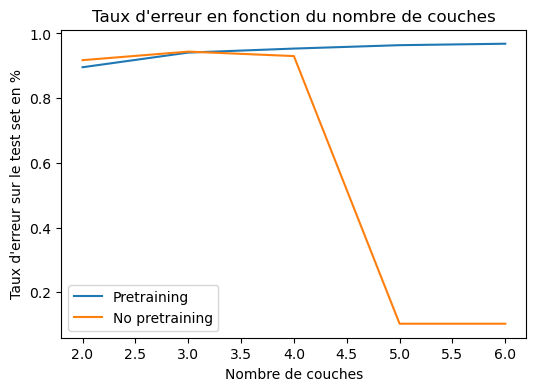

In [24]:
test_layer_sizes = [[784,10], [784, 200, 10], [784, 200, 200, 10], [784, 200, 200, 200, 10], [784, 200, 200, 200, 200, 10]]
error_rate_no_pretraining = []
error_rate_pretraining = []
for layer in test_layer_sizes:
    print(f"Test du modèle avec les couches {layer}")
    print("-- Pretraining model --")
    DNN_pretraining = DNN(layer)
    DNN_pretraining.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train, verbose = True, step=25)
    DNN_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_pretraining.append(DNN_pretraining.test_DNN(X_test, y_test))

    print("-- No pretraining model --")
    DNN_NO_pretraining = DNN(layer)
    DNN_NO_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_no_pretraining.append(DNN_NO_pretraining.test_DNN(X_test, y_test))

plt.figure(figsize=(6, 4))
plt.plot([len(layer) for layer in test_layer_sizes], error_rate_pretraining, label="Pretraining")
plt.plot([len(layer) for layer in test_layer_sizes], error_rate_no_pretraining, label="No pretraining")
plt.xlabel("Nombre de couches")
plt.ylabel("Taux d'erreur sur le test set en %")
plt.title("Taux d'erreur en fonction du nombre de couches")
plt.legend()
plt.show()

best pour [784, 200, 200, 200, 10] pour pretrained et [784, 200, 200, 10] pour no pretrained

#### Nombre de Neurones par layers : layer_sizes

Test du modèle avec les couches [784, 50, 50, 10]
-- Pretraining model --
Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/100, erreur de reconstruction: 0.06614970651946227
Epoch 26/100, erreur de reconstruction: 0.036913558128419635
Epoch 51/100, erreur de reconstruction: 0.035076105285259715
Epoch 76/100, erreur de reconstruction: 0.034346379772797204
Epoch 100/100, erreur de reconstruction: 0.033928537686432884
Entraînement RBM 2 / 3
Epoch 1/100, erreur de reconstruction: 0.18639340618561817
Epoch 26/100, erreur de reconstruction: 0.051391617407097766
Epoch 51/100, erreur de reconstruction: 0.03970704673384635
Epoch 76/100, erreur de reconstruction: 0.03597562384592649
Epoch 100/100, erreur de reconstruction: 0.03425080519080641
Entraînement RBM 3 / 3
Epoch 1/100, erreur de reconstruction: 0.12031349097178849
Epoch 26/100, erreur de reconstruction: 0.04966127554380758
Epoch 51/100, erreur de reconstruction: 0.04761424399319181
Epoch 76/100, erreur de reconstruction: 0.04

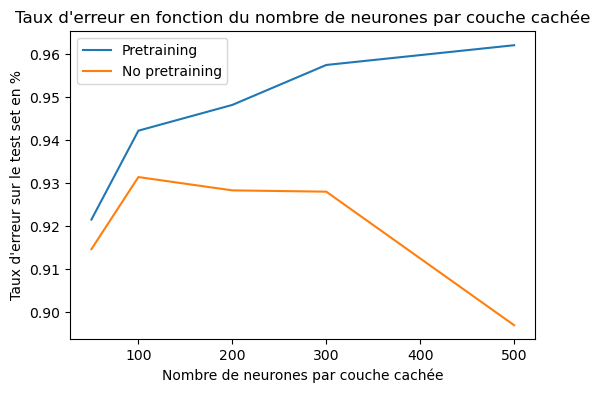

In [25]:
test_number_neurons = [[784, 50, 50, 10], [784, 100, 100, 10], [784, 200, 200, 10], [784, 300, 300, 10], [784, 500, 500, 10]]
error_rate_no_pretraining = []
error_rate_pretraining = []
for layer in test_number_neurons:
    print(f"Test du modèle avec les couches {layer}")
    print("-- Pretraining model --")
    DNN_pretraining = DNN(layer)
    DNN_pretraining.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train, verbose = True, step=25)
    DNN_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_pretraining.append(DNN_pretraining.test_DNN(X_test, y_test))

    print("-- No pretraining model --")
    DNN_NO_pretraining = DNN(layer)
    DNN_NO_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_no_pretraining.append(DNN_NO_pretraining.test_DNN(X_test, y_test))

plt.figure(figsize=(6, 4))
plt.plot([50, 100, 200, 300, 500], error_rate_pretraining, label="Pretraining")
plt.plot([50, 100, 200, 300, 500], error_rate_no_pretraining, label="No pretraining")
plt.xlabel("Nombre de neurones par couche cachée")
plt.ylabel("Taux d'erreur sur le test set en %")
plt.title("Taux d'erreur en fonction du nombre de neurones par couche cachée")
plt.legend()
plt.show()

best pour [784, 500, 500, 10] pour les 2

In [ ]:
## Essayer de mélanger les données avant de les donner au modèle
# from sklearn.utils import shuffle
# X_train_shuffle, y_train_shuffle = shuffle(X_train, y_train)

### Conclusion

#### Tuning des hyperparamètres -> sélection finale

In [26]:
layer_sizes = [784, 500, 500, 10]
mini_batch_size = 32
lr = 0.1
nb_epochs = 100

DNN_best = DNN(layer_sizes)
DNN_best.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
error_rate = DNN_best.test_DNN(X_test, y_test)

Entraînement DNN
Epoch 1/100, loss: 17.55334536058313
Epoch 26/100, loss: 17.878708334422903
Epoch 51/100, loss: 17.70035555318153
Epoch 76/100, loss: 18.01212358290761
Epoch 100/100, loss: 18.349728979239366
Accuracy: 0.0958


In [27]:
error_rate_best_train = DNN_best.test_DNN(X_train, y_train)
error_rate_best_test = DNN_best.test_DNN(X_test, y_test)

print("Best model results:")
print(f" Error rate for training set: {error_rate_best_train:.2f}")
print(f" Error rate for test set: {error_rate_best_test:.2f}")

Accuracy: 0.09863333333333334
Accuracy: 0.0958
Best model results:
 Error rate for training set: 0.10
 Error rate for test set: 0.10


#### Prediction sur 10 digits avec Untrained Model

In [ ]:
X = X_test[0:10]
for _, rbm in enumerate(DNN_best_train.RBM_layers[:-1]):
    X = rbm.entree_sortie_RBM(X)
predictions = np.argmax(DNN_best_train.calcul_softmax(X, DNN_best_train.RBM_layers[-1]), axis=1)

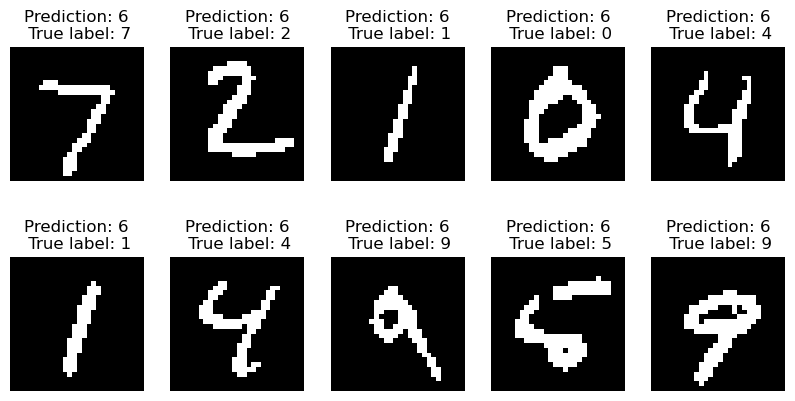

In [30]:
plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {predictions[i]}\n True label: {np.argmax(y_test[i])}")
    plt.axis('off')

In [31]:
layer_sizes = [784, 500, 500, 10]
mini_batch_size = 32
lr = 0.1
nb_epochs = 100

DNN_best_train = DNN(layer_sizes)
DNN_best_train.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train, verbose = True, step=25)
DNN_best_train.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
error_rate = DNN_best_train.test_DNN(X_test, y_test)

Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/100, erreur de reconstruction: 0.018542912442667286
Epoch 26/100, erreur de reconstruction: 0.005980912566364284
Epoch 51/100, erreur de reconstruction: 0.0051951964472163725
Epoch 76/100, erreur de reconstruction: 0.00486392505504027
Epoch 100/100, erreur de reconstruction: 0.0046964167867415444
Entraînement RBM 2 / 3
Epoch 1/100, erreur de reconstruction: 0.025789048539989274
Epoch 26/100, erreur de reconstruction: 0.009108547175479537
Epoch 51/100, erreur de reconstruction: 0.008511128329922258
Epoch 76/100, erreur de reconstruction: 0.00828126387221462
Epoch 100/100, erreur de reconstruction: 0.008082025474089996
Entraînement RBM 3 / 3
Epoch 1/100, erreur de reconstruction: 0.06108503642011201
Epoch 26/100, erreur de reconstruction: 0.054251228963720324
Epoch 51/100, erreur de reconstruction: 0.05379791411103432
Epoch 76/100, erreur de reconstruction: 0.053311388279749475
Epoch 100/100, erreur de reconstruction: 0.05329485

In [32]:
error_rate_best_train_train = DNN_best_train.test_DNN(X_train, y_train)
error_rate_best_train_test = DNN_best_train.test_DNN(X_test, y_test)

print("Best model results:")
print(f" Error rate for training set: {error_rate_best_train_train:.2f}")
print(f" Error rate for test set: {error_rate_best_train_test:.2f}")

Accuracy: 0.9999166666666667
Accuracy: 0.9766
Best model results:
 Error rate for training set: 1.00
 Error rate for test set: 0.98


#### Prediction sur 10 digits avec Trained Model

In [33]:
X = X_test[0:10]
for _, rbm in enumerate(DNN_best_train.RBM_layers[:-1]):
    X = rbm.entree_sortie_RBM(X)
predictions = np.argmax(DNN_best_train.calcul_softmax(X, DNN_best_train.RBM_layers[-1]), axis=1)

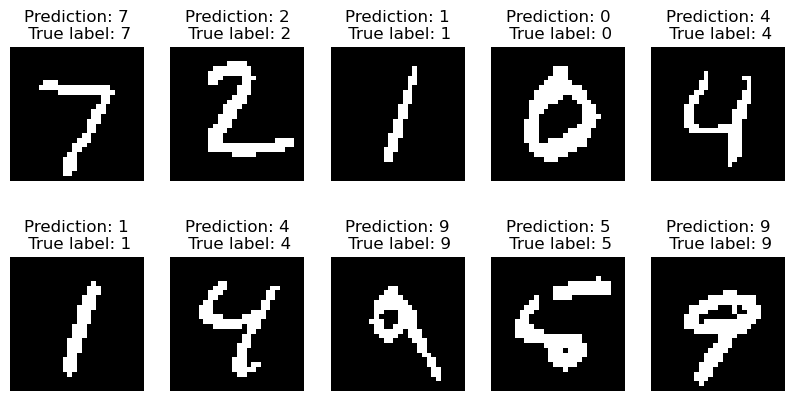

In [34]:
plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {predictions[i]}\n True label: {np.argmax(y_test[i])}")
    plt.axis('off')